Saving ifood_df.csv to ifood_df.csv
📝 Dataset Preview:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


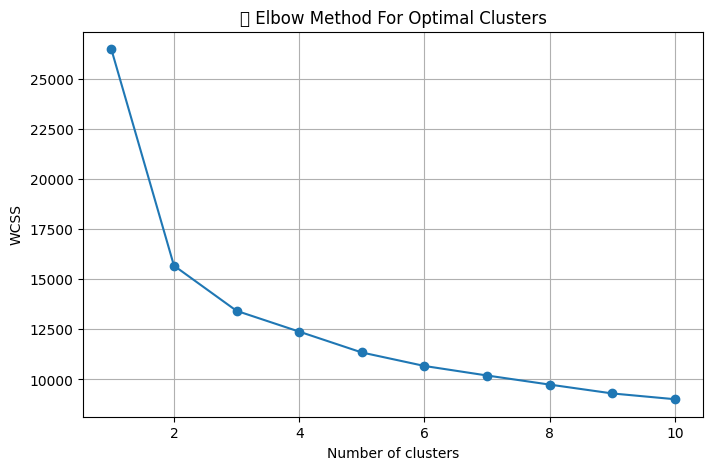

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


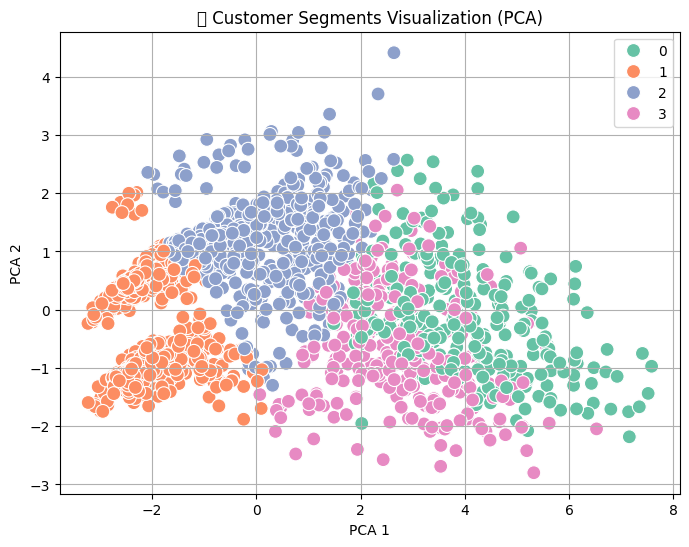


📈 Cluster Summary:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        77686.644860  0.049844  0.124611  50.635514  827.330218  58.009346   
1        33975.586310  0.856151  0.414683  48.983135   47.454365   5.375000   
2        57900.087034  0.122558  0.957371  48.234458  421.316163  15.884547   
3        70428.645367  0.086262  0.383387  48.817891  397.715655  80.629393   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             557.031153        83.520249         60.115265     63.124611   
1              26.431548         7.781746          5.303571     16.647817   
2             114.197158        22.085258         16.113677     53.202487   
3             302.779553       115.543131         83.396166     96.322684   

            MntTotal  MntRegularProds  
Cl

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load Dataset (Skip if already loaded)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('ifood_df.csv')

# Step 3: Preview
print("📝 Dataset Preview:")
print(df.head())

print("\n📏 Dataset Info:")
print(df.info())

# Step 4: Check missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Step 5: Drop non-numerical or unnecessary columns (if any)
# Already one-hot encoded and clean dataset, keep only relevant numerical features
features = ['Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds']

X = df[features]

# Step 6: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('🧮 Elbow Method For Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 8: Apply KMeans Clustering (choose k=4 or 5 from elbow curve)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 9: Add cluster column to original DataFrame
df['Cluster'] = clusters

# Step 10: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('📊 Customer Segments Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Step 11: Analyze clusters
print("\n📈 Cluster Summary:")
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

# Optional: Count of customers in each cluster
print("\n👥 Customers per Cluster:")
print(df['Cluster'].value_counts())
